In [1]:
###########################################
############# Packages Import #############
###########################################
# Dataframe manipulation
import pandas as pd
import polars as pl

# Analysis and visualization
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sns

# Remove the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/eduardoesteves/dev/kaggle/dementia-patient-health-and-prescriptions-dataset/dementia_patients_health_data.csv', index_col=False)
df.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028          NaN           NaN   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine          12.0   61  ...   Former Smoker   
2  59.759066  37.640435          NaN           NaN   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil          23.0   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine          20.0   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [3]:
for column_headers in df.columns:
    print(column_headers)

Diabetic
AlcoholLevel
HeartRate
BloodOxygenLevel
BodyTemperature
Weight
MRI_Delay
Prescription
Dosage in mg
Age
Education_Level
Dominant_Hand
Gender
Family_History
Smoking_Status
APOE_ε4
Physical_Activity
Depression_Status
Cognitive_Test_Scores
Medication_History
Nutrition_Diet
Sleep_Quality
Chronic_Health_Conditions
Dementia


In [4]:
#df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [5]:
#df.select_dtypes(include=[object])
summaryse_object = df.describe(include=[object])
summaryse_object

Prescription Education_Level Dominant_Hand  Gender Family_History  \
count           485            1000          1000    1000           1000   
unique            4               4             2       2              2   
top       Memantine  Primary School          Left  Female            Yes   
freq            128             389           519     504            520   

       Smoking_Status   APOE_ε4 Physical_Activity Depression_Status  \
count            1000      1000              1000              1000   
unique              3         2                 3                 2   
top     Former Smoker  Positive     Mild Activity                No   
freq              458       694               351               755   

       Medication_History      Nutrition_Diet Sleep_Quality  \
count                1000                1000          1000   
unique                  2                   3             2   
top                   Yes  Mediterranean Diet          Poor   
freq                  514                 338           534   

       Chronic_Health_Conditions  
count                        821  
unique                         3  
top                     Diabetes  
freq                         513

In [6]:
#df.select_dtypes(include=[float])
summaryse_float = df.describe(include=[float])
summaryse_float

AlcoholLevel  BloodOxygenLevel  BodyTemperature       Weight  \
count   1000.000000       1000.000000      1000.000000  1000.000000   
mean       0.098429         95.226051        36.761513    74.321326   
std        0.058715          2.929262         0.431701    14.463765   
min        0.000414         90.010677        36.002108    50.069731   
25%        0.045505         92.875017        36.395363    61.387339   
50%        0.098235         95.390420        36.784319    74.149204   
75%        0.151840         97.785111        37.126655    87.024034   
max        0.199866         99.999230        37.496809    99.982722   

         MRI_Delay  Dosage in mg  
count  1000.000000    485.000000  
mean     30.103568      9.213402  
std      16.862170      6.493188  
min       0.094684      1.500000  
25%      16.237371      4.000000  
50%      29.577194      8.000000  
75%      44.176723     12.000000  
max      59.957599     23.000000

In [7]:
summaryse_integer = df.describe(include=[int])
summaryse_float

AlcoholLevel  BloodOxygenLevel  BodyTemperature       Weight  \
count   1000.000000       1000.000000      1000.000000  1000.000000   
mean       0.098429         95.226051        36.761513    74.321326   
std        0.058715          2.929262         0.431701    14.463765   
min        0.000414         90.010677        36.002108    50.069731   
25%        0.045505         92.875017        36.395363    61.387339   
50%        0.098235         95.390420        36.784319    74.149204   
75%        0.151840         97.785111        37.126655    87.024034   
max        0.199866         99.999230        37.496809    99.982722   

         MRI_Delay  Dosage in mg  
count  1000.000000    485.000000  
mean     30.103568      9.213402  
std      16.862170      6.493188  
min       0.094684      1.500000  
25%      16.237371      4.000000  
50%      29.577194      8.000000  
75%      44.176723     12.000000  
max      59.957599     23.000000

## List the unique values in each column

In [8]:
# Create a list to hold data about each column
data = [{'Column Name': col, 'Unique Values Count': df[col].nunique()} for col in df.columns]

# Convert the list of dictionaries to a DataFrame
columns_info = pd.DataFrame(data)

# Display the newly created DataFrame
columns_info

Column Name  Unique Values Count
0                    Diabetic                    2
1                AlcoholLevel                 1000
2                   HeartRate                   41
3            BloodOxygenLevel                 1000
4             BodyTemperature                 1000
5                      Weight                 1000
6                   MRI_Delay                 1000
7                Prescription                    4
8                Dosage in mg                   10
9                         Age                   31
10            Education_Level                    4
11              Dominant_Hand                    2
12                     Gender                    2
13             Family_History                    2
14             Smoking_Status                    3
15                    APOE_ε4                    2
16          Physical_Activity                    3
17          Depression_Status                    2
18      Cognitive_Test_Scores                   11
19         Medication_History                    2
20             Nutrition_Diet                    3
21              Sleep_Quality                    2
22  Chronic_Health_Conditions                    3
23                   Dementia                    2

# Analysis

### Pairplot the columns  

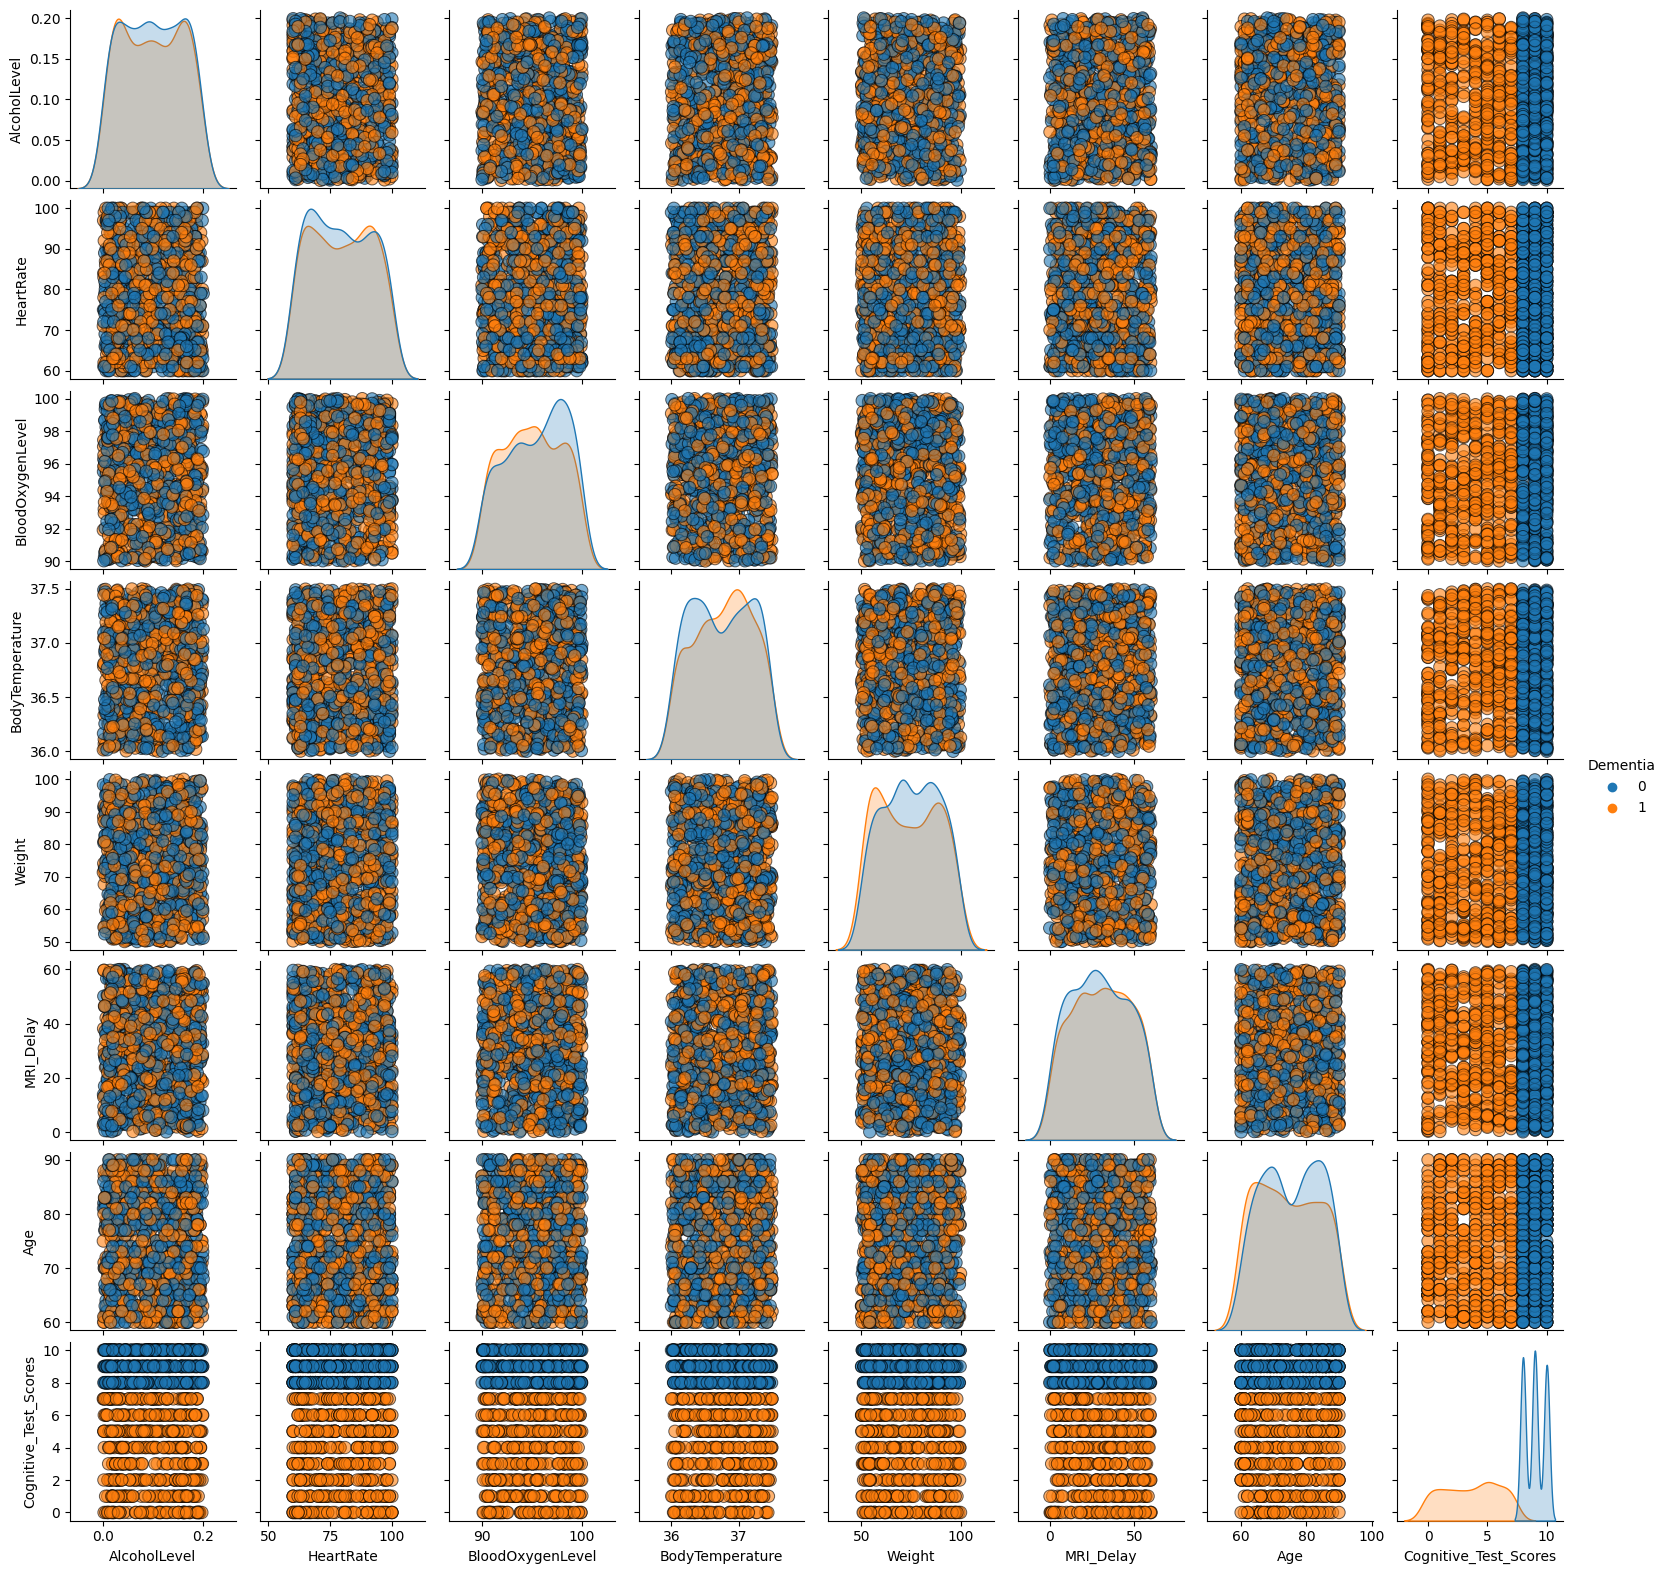

In [9]:
new_df = df[['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Age', 'Cognitive_Test_Scores', 'Dementia']]
sns.pairplot(new_df, hue= 'Dementia',diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size=2)

## Count the missing values and list them

In [10]:
# Count missing values for each column
missing_values_count = df.isnull().sum()

# Display the counts
print("Column Name", "Missing Values Count", sep="\t")
print("------------------------------------")
for column, count in missing_values_count.items():
    print(f"{column}", f"{count}", sep="\t\t")


Column Name	Missing Values Count
------------------------------------
Diabetic		0
AlcoholLevel		0
HeartRate		0
BloodOxygenLevel		0
BodyTemperature		0
Weight		0
MRI_Delay		0
Prescription		515
Dosage in mg		515
Age		0
Education_Level		0
Dominant_Hand		0
Gender		0
Family_History		0
Smoking_Status		0
APOE_ε4		0
Physical_Activity		0
Depression_Status		0
Cognitive_Test_Scores		0
Medication_History		0
Nutrition_Diet		0
Sleep_Quality		0
Chronic_Health_Conditions		179
Dementia		0


# Classification analysis

In [11]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

ModuleNotFoundError: No module named 'ISLP'

In [ ]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df.columns

In [ ]:
# Remove the outcome (Dementia) column
analysis_df = df.drop(columns=['Dementia'])
analysis_df.columns

We compute the correlation matrix using the `corr()` method
for data frames, which produces a matrix that contains all of
the pairwise correlations among the variables.
 
By instructing `pandas` to use only numeric variables, the `corr()` method does not report a correlation for the `??????`  variable because it is
 qualitative.

In [ ]:
df.corr(numeric_only=True)

In [ ]:
allvars = analysis_df.select_dtypes(exclude=['object'])
allvars.dropna(axis='columns')
allvars.columns

In [ ]:
df1 = df.dropna()
design = MS(allvars)
X = design.fit_transform(df1)
y = df1.Dementia == '1'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

The `predict()`  method of `results` can be used to predict the
probability that the market will go up, given values of the
predictors. This method returns predictions
on the probability scale. If no data set is supplied to the `predict()`
function, then the probabilities are computed for the training data
that was used to fit the logistic regression model.
As with linear regression, one can pass an optional `exog` argument consistent
with a design matrix if desired. Here we have
printed only the first ten probabilities.

In [ ]:
probs = results.predict()
probs[:10]

In [ ]:
labels = df1['Dementia'].map({0:'Healthy',1:'Dement'})

In [ ]:
confusion_table(labels, df1['Dementia'])